Finding knickpoints in a deformation time series between two points, calculating slopes of each interval 

In [51]:
# import stuff
import os,sys
import glob
import pandas
from osgeo import gdal
import datetime 
from datetime import datetime
from datetime import timedelta
from dateutil import parser
import numpy as np
from scipy.ndimage import uniform_filter, gaussian_filter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib  widget

In [65]:
# make synthetic data to test

# fixing random state for reproducibility
np.random.seed(20686454)

# x values 
x = np.arange(0,100,1)
noise=np.random.randn(100)*2.2
y = np.ndarray((100),'float')
y[0] = 0
for i in x:
    if x[i] < 10:
        y[i] = y[i-1]+0.5
    elif x[i] < 25:
        y[i] = y[i-1]-0.02
    elif x[i] < 48:
        y[i] = y[i-1]+0.8
    elif x[i] < 75:
        y[i] = y[i-1]-0.3
    else:
        y[i] = y[i-1]+0.4
# add noise
ynoise = y + noise
# make coherence values low at knickpoints like the real data is 
coh = np.random.randn(100)*0.1+0.8
coh[10]=0.5
coh[25]=0.52
coh[48]=0.49
coh[75]=0.543

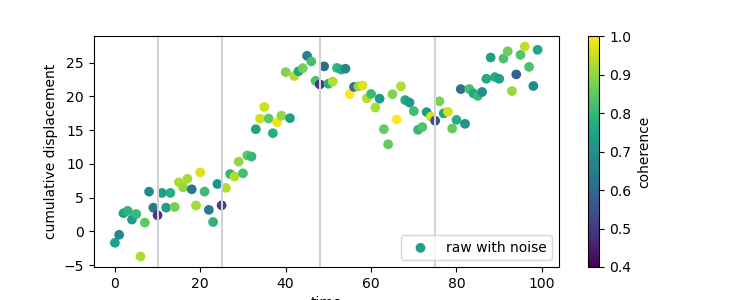

In [69]:
plt.figure(figsize=(7.5, 3))
plt.axvline(x=10,c='lightgray');plt.axvline(x=25,c='lightgray');
plt.axvline(x=48,c='lightgray');plt.axvline(x=75,c='lightgray');
plt.scatter(x,ynoise,c=coh,vmin=0.4,vmax=1,label='raw with noise')
plt.xlabel('time'); plt.ylabel('cumulative displacement')
plt.legend(); cbar = plt.colorbar(); cbar.set_label('coherence')
plt.show()

In [56]:
# find the knickpoints (where slope changes)
der = np.diff(ynoise) / np.diff(x)
x2 = (x[:-1] + x[1:]) / 2

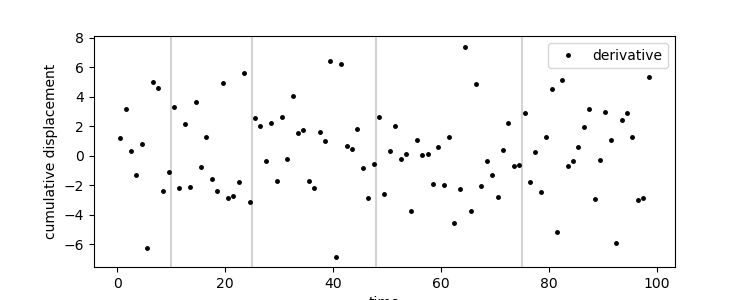

In [58]:
plt.figure(figsize=(7.5, 3))
plt.axvline(x=10,c='lightgray');plt.axvline(x=25,c='lightgray');
plt.axvline(x=48,c='lightgray');plt.axvline(x=75,c='lightgray');
#plt.plot(x,ynoise,'g.',markersize=5,label='raw with noise')
plt.plot(x2,der,'k.',markersize=5,label='derivative')
plt.xlabel('time'); plt.ylabel('cumulative displacement')
plt.legend()
plt.show()

In [91]:
# Calculate slope between knickpoints
# set the threshhold for defining a knickpoint 
cutoff = 0.6
knix = np.where(coh < cutoff)
knix = knix[0]
numKnix = len(knix)
print('number of knickpoints: '+str(numKnix))
print(knix)

number of knickpoints: 5
[10 25 48 75 94]


In [98]:
# calculate slope between knickpoints
slopes = np.ndarray(numKnix+1,'float')
yCalc = np.ndarray((100),'float')
for i in np.arange(numKnix):
    print(i)
    # first slope is between first data point up to first knix index
    if i == 0: 
        m, b = np. polyfit(x[0:knix[0]], ynoise[0:knix[0]], 1)
        slopes[i]= m
        print(slopes[i])
        yCalc[0:knix[0]] = m*x[0:knix[0]]+b
    # last slope is between last knix index and last data point
    elif i == numKnix-1:
        m, b = np. polyfit(x[knix[i]:-1], ynoise[knix[i]:-1], 1)
        slopes[i]= m
        print(slopes[i])
        yCalc[knix[i]:-1] = m*x[knix[i]:-1]+b
    #
    else:
        m, b = np. polyfit(x[knix[i-1]:knix[i]], ynoise[knix[i-1]:knix[i]], 1)
        slopes[i]= m
        print(slopes[i])
        yCalc[knix[i-1]:knix[i]] = m*x[knix[i-1]:knix[i]]+b

0
0.39446450560920826
1
0.049565045970569654
2
0.9229708017320505
3
-0.2881924582253538
4
-0.5190272325412756


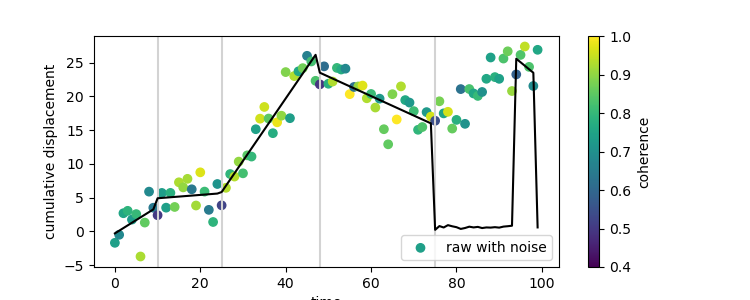

In [101]:
plt.figure(figsize=(7.5, 3))
plt.axvline(x=10,c='lightgray');plt.axvline(x=25,c='lightgray');
plt.axvline(x=48,c='lightgray');plt.axvline(x=75,c='lightgray');
plt.scatter(x,ynoise,c=coh,vmin=0.4,vmax=1,label='raw with noise')
plt.plot(x,yCalc,'k-') 
plt.xlabel('time'); plt.ylabel('cumulative displacement')
plt.legend(); cbar = plt.colorbar(); cbar.set_label('coherence')
plt.show()